In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
df = pd.read_csv(r"D:\ExcelR_Assignments\Multi_Linear_Regression\Datasets\50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
# Descriptive Statistics

In [11]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [12]:
df.var()

R&D Spend          2.107017e+09
Administration     7.849973e+08
Marketing Spend    1.495492e+10
Profit             1.624588e+09
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [14]:
df.shape

(50, 5)

In [15]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: >

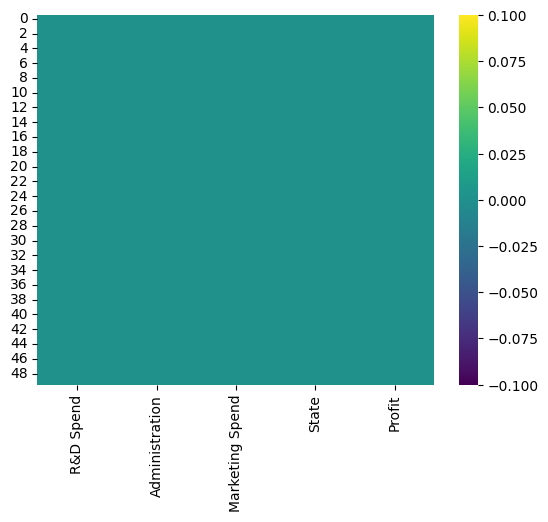

In [16]:
sns.heatmap(df.isna(), cmap = 'viridis')

In [17]:
# No missing values are present

In [18]:
# Checking for duplicated records

In [19]:
df[df.duplicated()].shape

(0, 5)

In [20]:
df[df.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [21]:
# There are no duplicated records

In [22]:
# Checking for presence of outliers / extreme values 

<Axes: >

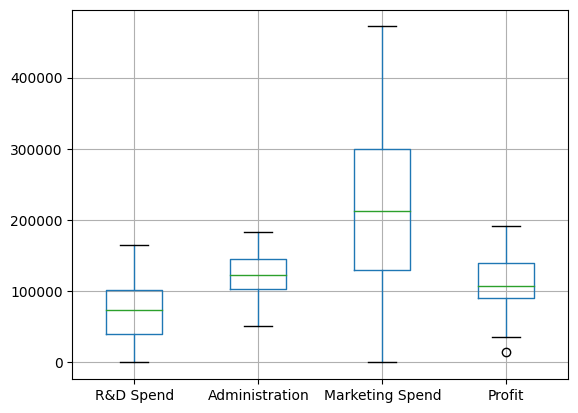

In [23]:
df.boxplot()

In [24]:
def outliers_detect(data,colname):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    return lower, upper

In [25]:
outliers_detect(df,'Profit')

(R&D Spend          -52563.27500
 Administration      42063.91750
 Marketing Spend   -125953.29625
 Profit              15698.29000
 dtype: float64,
 R&D Spend          194102.44500
 Administration     206509.13750
 Marketing Spend    554722.51375
 Profit             214206.59000
 dtype: float64)

In [26]:
df[df['Profit'] < 15698.29000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [27]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
# Temparory we are not removing this extreme value, we will check model performance with and without this record then we'll decide.

In [29]:
# Checking correlation between columns

In [30]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [31]:
# Visualizing the correlations

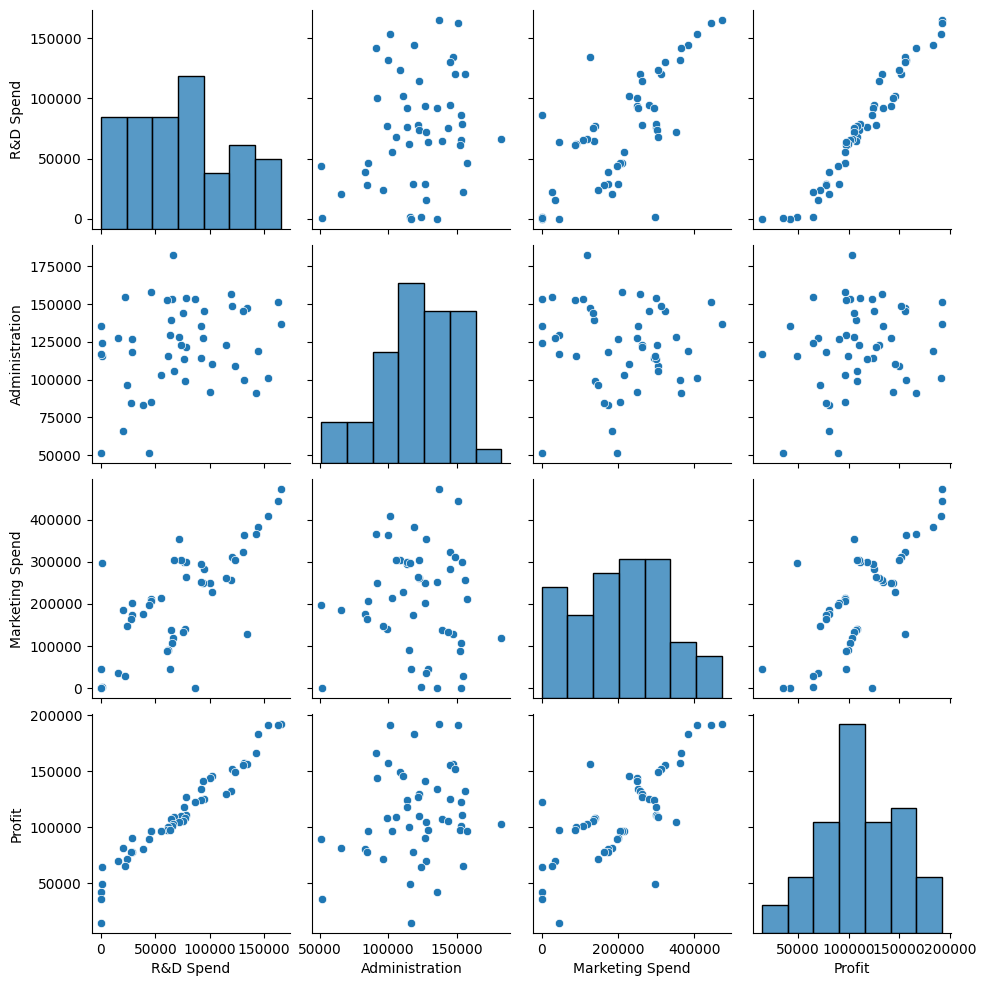

In [32]:
sns.pairplot(df)

<Axes: >

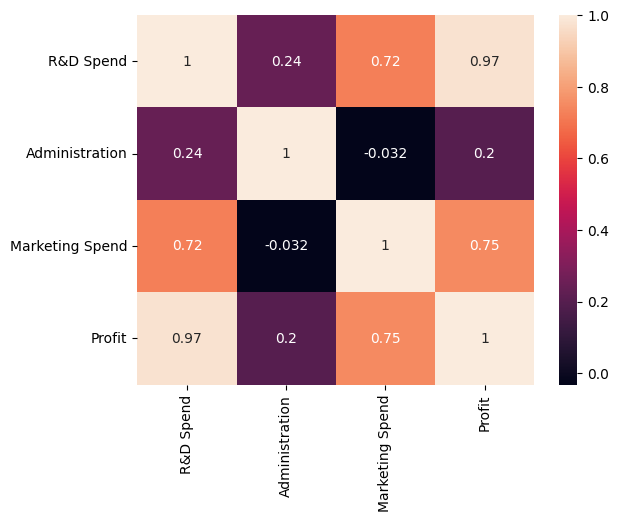

In [33]:
sns.heatmap(df.corr(), annot = True)

In [34]:
# We can see there is high multicollinearity between (profit & r&d_spend) ,(marketing_spend & r&d_spend), (marketing_spend & profit)

In [35]:
# Performing Data Transformation for converting categorical column(State) to numerical, 

# As "State" column is imortant x-feature for model to predict profit 
# Converting 'State' column from categorical to numerical.

In [36]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [37]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [38]:
df = pd.get_dummies(df)

In [39]:
# Renaming Columns for betterment

In [40]:
df = df.rename(columns={'R&D Spend':'RnD_Spend','Marketing Spend':'Marketing_Spend','State_New York':'State_New_York'})
df.head()

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [41]:
# Basic model building with extreme values.

In [42]:
basic_model = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend+Profit+State_California+State_Florida+State_New_York', data=df).fit()
basic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.886e+29
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:49:11   Log-Likelihood:                 1046.0
No. Observations:                  50   AIC:                            -2078.
Df Residuals:                      43   BIC:                            -2065.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept                 0   1.73e-10          0      1.000   -3.49e-10    3.49e-10
RnD_Spend        -8.604e-16   2.95e-15     -0.291      0.772   -6.82e-15     5.1e-15
Administration    3.053e-16   1.19e-15      0.257      0.799   -2.09e-15    2.71e-15
Marketing_Spend   1.232e-16      4e-16      0.308      0.760   -6.84e-16     9.3e-16
Profit               1.0000   3.42e-15   2.92e+14      0.000       1.000       1.000
State_California -1.455e-11   7.02e-11     -0.207      0.837   -1.56e-10    1.27e-10
State_Florida    -1.637e-11   7.57e-11     -0.216      0.830   -1.69e-10    1.36e-10
State_New_York    4.547e-12   7.08e-11      0.064      0.949   -1.38e-10    1.47e-10
==============================================================================
Omnibus:                        1.518   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                0.734
Skew:                          -0.027   Prob(JB):                        0.693
Kurtosis:                       3.591   Cond. No.                     5.43e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
basic_model.params

Intercept           0.000000e+00
RnD_Spend          -8.604228e-16
Administration      3.053113e-16
Marketing_Spend     1.231654e-16
Profit              1.000000e+00
State_California   -1.455192e-11
State_Florida      -1.637090e-11
State_New_York      4.547474e-12
dtype: float64

In [44]:
basic_model.pvalues

Intercept           1.000000
RnD_Spend           0.772275
Administration      0.798734
Marketing_Spend     0.759735
Profit              0.000000
State_California    0.836727
State_Florida       0.829716
State_New_York      0.949056
dtype: float64

In [45]:
basic_model.rsquared, basic_model.aic

(1.0, -2077.965447352522)

In [46]:
# Q-Q plot of basic_model.

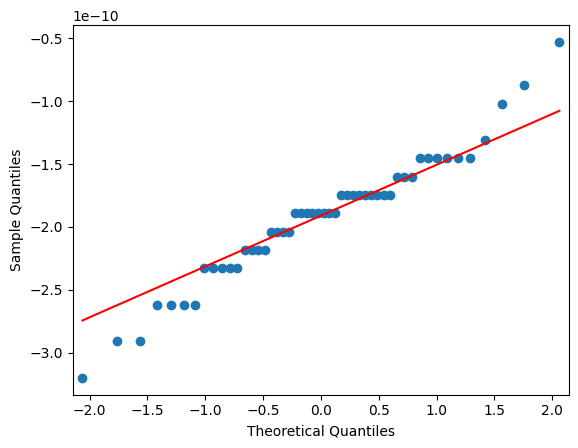

In [47]:
sm.qqplot(basic_model.resid, line='q');

In [48]:
new_df=df.drop(columns=['Profit'])

In [49]:
VIF = pd.DataFrame({
    'Features': new_df.columns,
    'VIF': [variance_inflation_factor(new_df.values, i) for i in range(len(new_df.columns))]
})
VIF

,Features,VIF
0,RnD_Spend,2.495511
1,Administration,1.177766
2,Marketing_Spend,2.416797
3,State_California,9.044052
4,State_Florida,9.443578
5,State_New_York,9.222969


In [50]:
# 'RnD_Spend' and 'Marketing_Spend' have a high variance inflation factor
# We need to discard one of these variables to improve model and try to solve multicolinearity.

In [51]:
# Subset Selection

In [52]:
# Removed "RnD_Spend" column and checking model performance

In [53]:
marketing_model = smf.ols('Profit ~ Administration + Marketing_Spend + State_California + State_Florida + State_New_York', data=df).fit()
marketing_model.rsquared, marketing_model.aic

(0.6131075019799208, 1163.8293070259358)

In [54]:
# Removed "Marketing_Spend" column and checking model performance

In [55]:
RnD_model = smf.ols('Profit~RnD_Spend+Administration+State_California+State_Florida+State_New_York', data=df).fit()
RnD_model.rsquared, RnD_model.aic

(0.9479799298023537, 1063.503443921346)

In [56]:
# here r_square of 'RnD_model' > r_square of 'marketing_model'
# and AIC value of 'RnD_model' < AIC value of 'marketing_model'
# so we will keep "RnD_Spend" column and deletig "marketing_spend" column for final_model building.

In [57]:
# Model Validation Techniques

In [58]:
#1. Residual Analysis
# Normality Test

In [59]:
model = smf.ols('Profit~RnD_Spend+Administration+State_California+State_Florida+State_New_York', data=df).fit()
model.rsquared

0.9479799298023537

In [60]:
# Calculating residuals values

In [61]:
model.fittedvalues # errors

0     189700.624024
1     186608.031891
2     182463.965501
3     172602.148419
4     173220.367395
5     162838.532534
6     162738.163385
7     160200.405138
8     150503.212670
9     155056.794397
10    137604.798779
11    136436.231244
12    129793.524863
13    126660.507595
14    150705.143703
15    146697.189391
16    115358.109519
17    128410.242041
18    128665.838465
19    120873.912205
20    114250.977785
21    113946.963797
22    112927.153922
23    108261.595271
24    115660.625644
25    102920.037502
26    112950.459643
27    109904.372329
28    102933.896513
29    102980.211066
30    102972.588783
31     99150.131529
32    102383.491939
33     98039.459336
34     86262.165485
35     89696.881004
36     73676.321144
37     89842.091105
38     68505.515086
39     83426.576964
40     73111.709605
41     75244.494380
42     69887.831530
43     61200.843951
44     65538.807838
45     48883.154211
46     50724.377164
47     47467.208498
48     52305.030098
49     48439.243712


In [62]:
model.resid # residuals (Difference between actual values - predicted values)

0      2561.205976
1      5184.028109
2      8586.424499
3     10299.841581
4     -7032.427395
5     -5847.412534
6     -6615.653385
7     -4447.805138
8      1708.557330
9     -5296.834397
10     8517.151221
11     7823.168756
12    11791.995137
13     7646.842405
14   -18102.493703
15   -16780.149391
16    11634.820481
17    -3039.872041
18    -4398.938465
19     1902.947795
20     4223.052215
21    -2633.943797
22    -2574.903922
23      472.394729
24    -7108.585644
25     4484.302498
26    -7216.919643
27    -4896.062329
28      348.483487
29    -1975.571066
30    -3034.998783
31    -1666.571529
32    -4955.651939
33    -1260.539336
34    10450.634515
35     6782.628996
36    17031.868856
37      107.048895
38    12723.544914
39    -2420.816964
40     5128.200395
41     2554.335620
42     1610.658470
43     8558.136049
44     -338.477838
45    16042.925789
46    -1233.627164
47    -4907.478498
48   -16631.620098
49   -33757.843712
dtype: float64

In [63]:
# Checking for normality of residuals 
#1. histogram 

<Axes: ylabel='Count'>

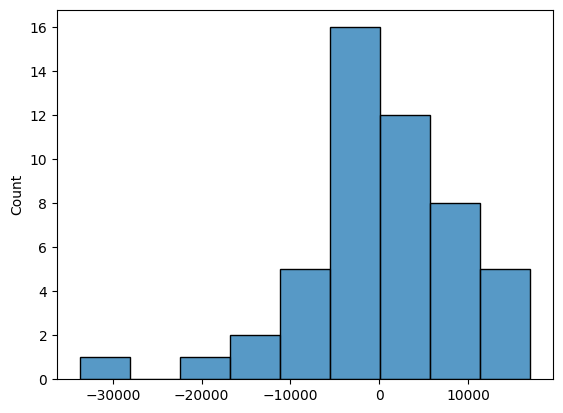

In [64]:
sns.histplot(data = df, x = model.resid)

In [65]:
model.resid.mean()

1.3128636055625976e-07

In [66]:
# here mean of residual is approximately 0. 
# plotting histogram we can see that residuals is having negative high skewness

In [67]:
#2. Q-Q plot

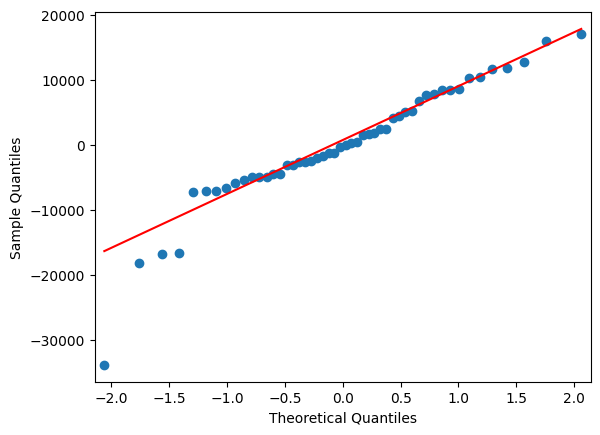

In [68]:
sm.qqplot(model.resid, line='q');

In [69]:
# We can see there is high skewness is present in residuals

In [70]:
# Getting index no. of higher residual and lower residual
lower_residual = np.argmin(model.resid), np.min(model.resid)
higher_residual = np.argmax(model.resid), np.max(model.resid)
print('Lower is :', lower_residual, 'Higher is :', higher_residual)

Lower is : (49, -33757.8437121439) Higher is : (36, 17031.868856074507)


In [71]:
# Plotting residuals plot of homoscedasticity

In [72]:
model.params

Intercept           41216.552370
RnD_Spend               0.860907
Administration         -0.052704
State_California    13388.262738
State_Florida       14479.370256
State_New_York      13348.919376
dtype: float64

Text(0, 0.5, 'Errors')

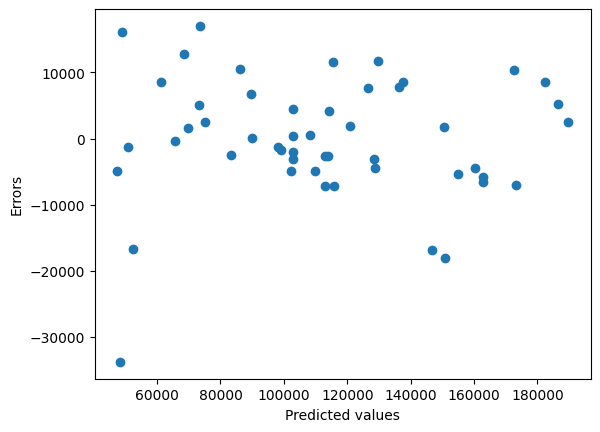

In [73]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted values')
plt.ylabel('Errors')

In [74]:
# some of the datapoints are clustered together and some of datapoints are far away from mejority of records.

In [75]:
#3. Residuals v/s regressors plot

In [76]:
df.head()

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


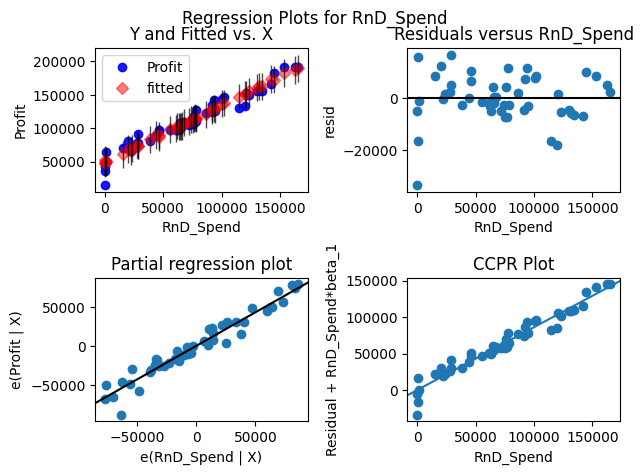

In [77]:
sm.graphics.plot_regress_exog(model, 'RnD_Spend');

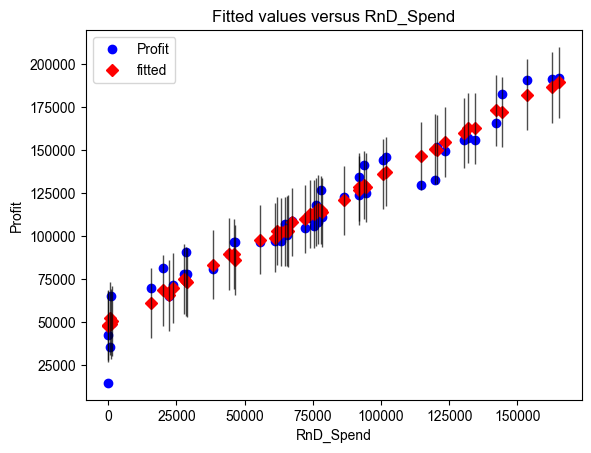

In [78]:
sm.graphics.plot_fit(model, 'RnD_Spend');
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [79]:
# There is some difference between Actual value and predicted values

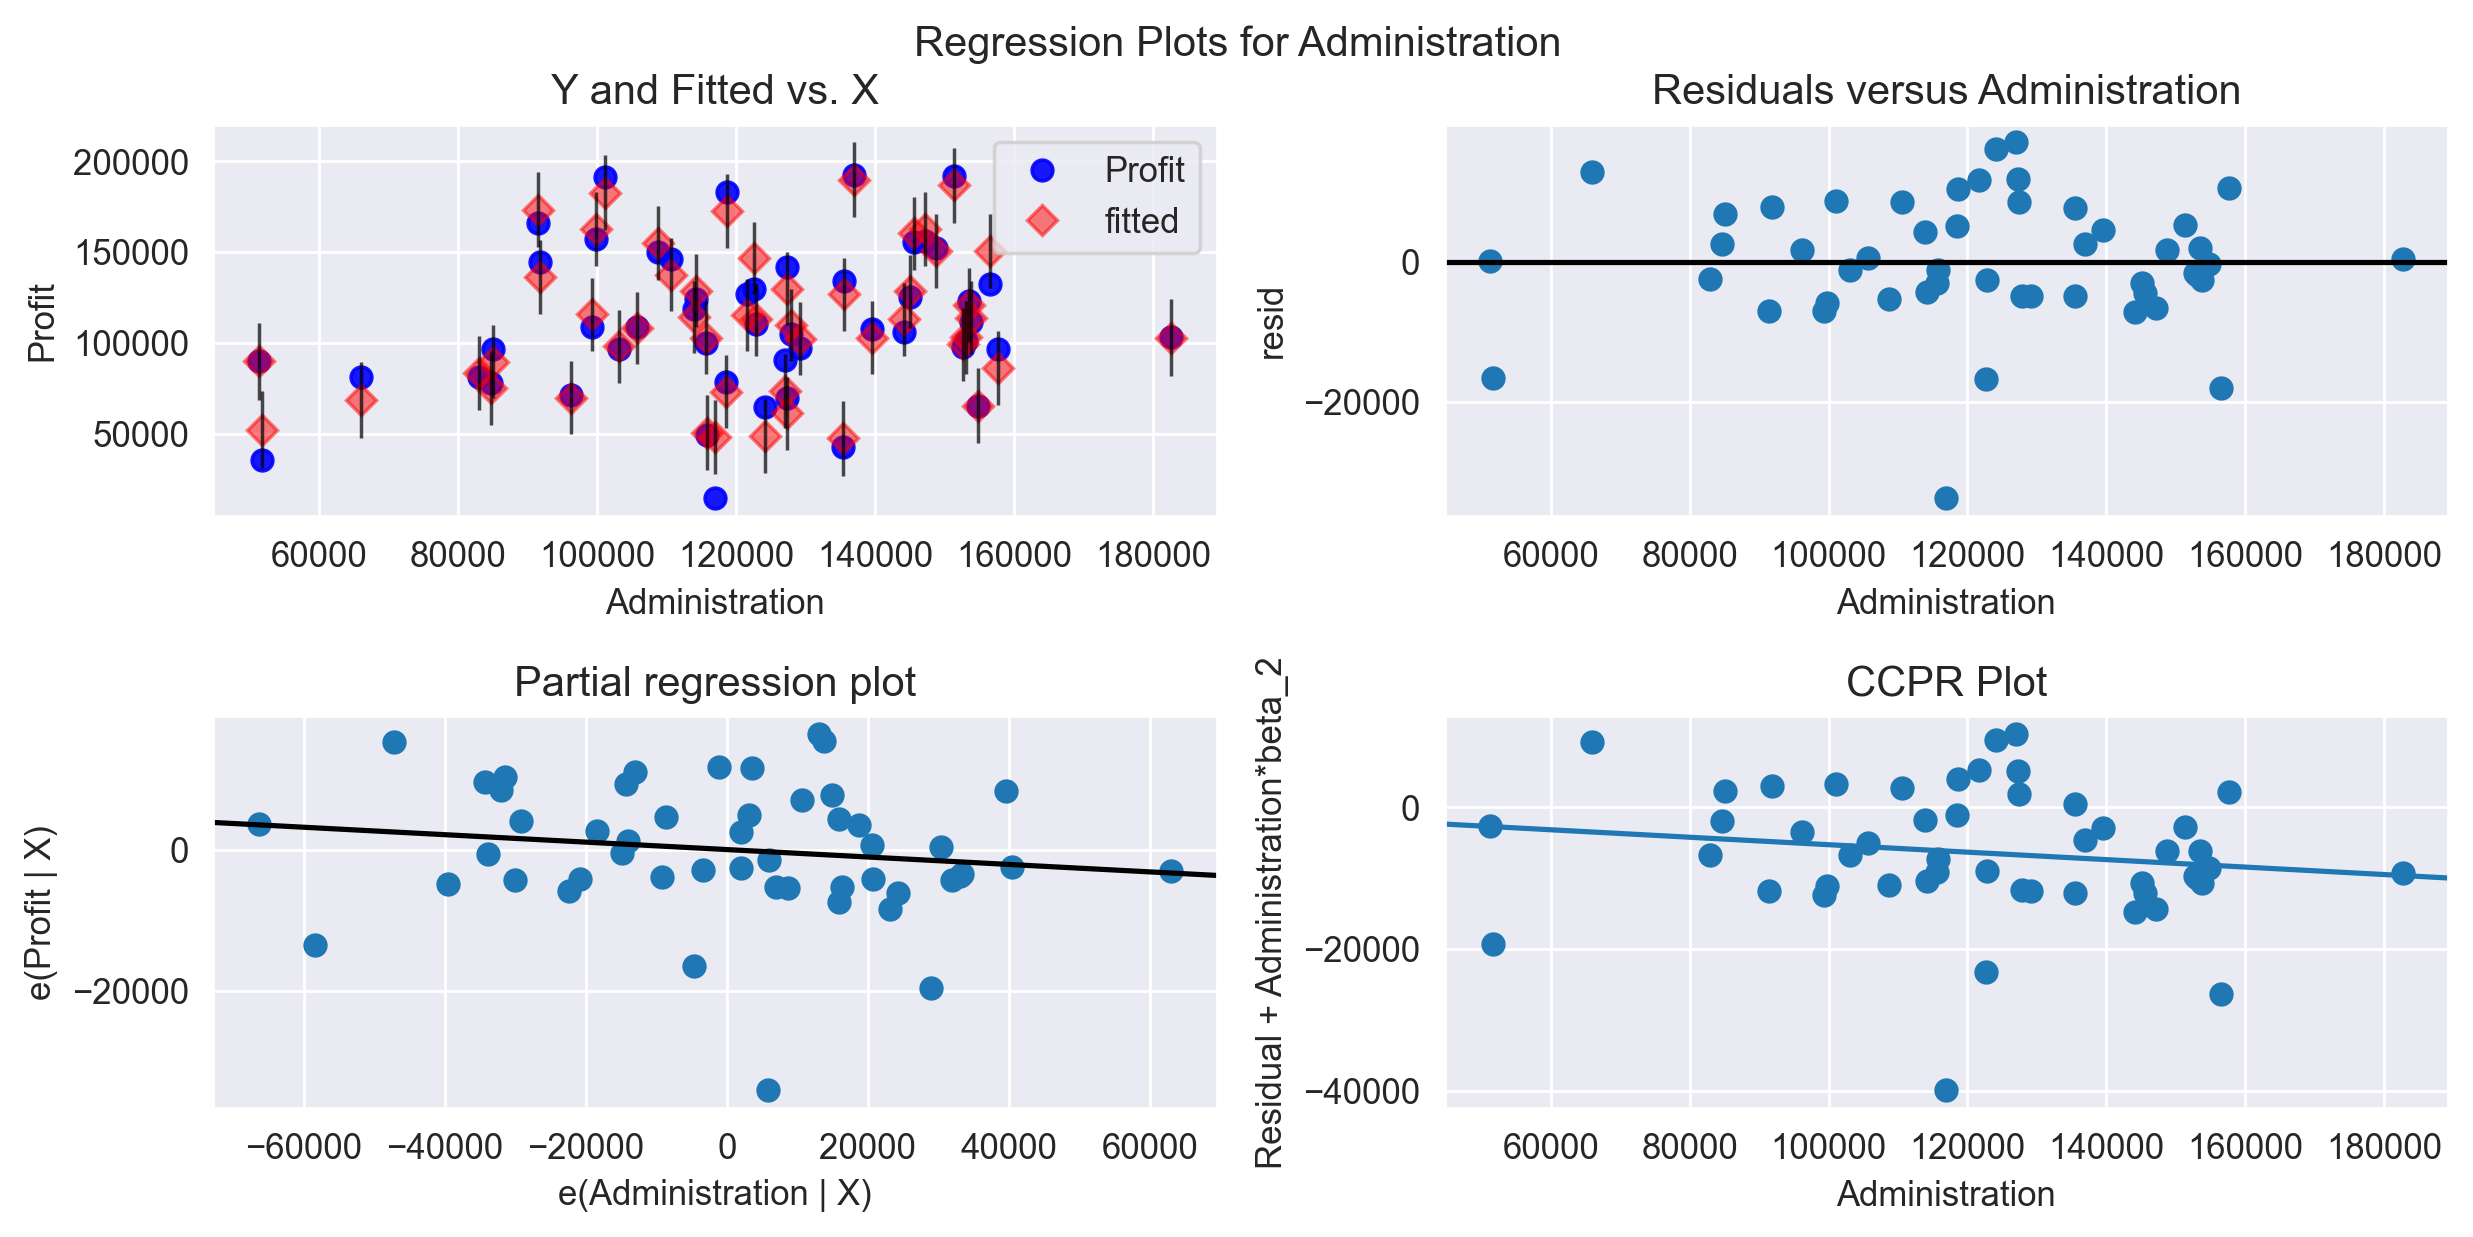

In [80]:
sm.graphics.plot_regress_exog(model, 'Administration');

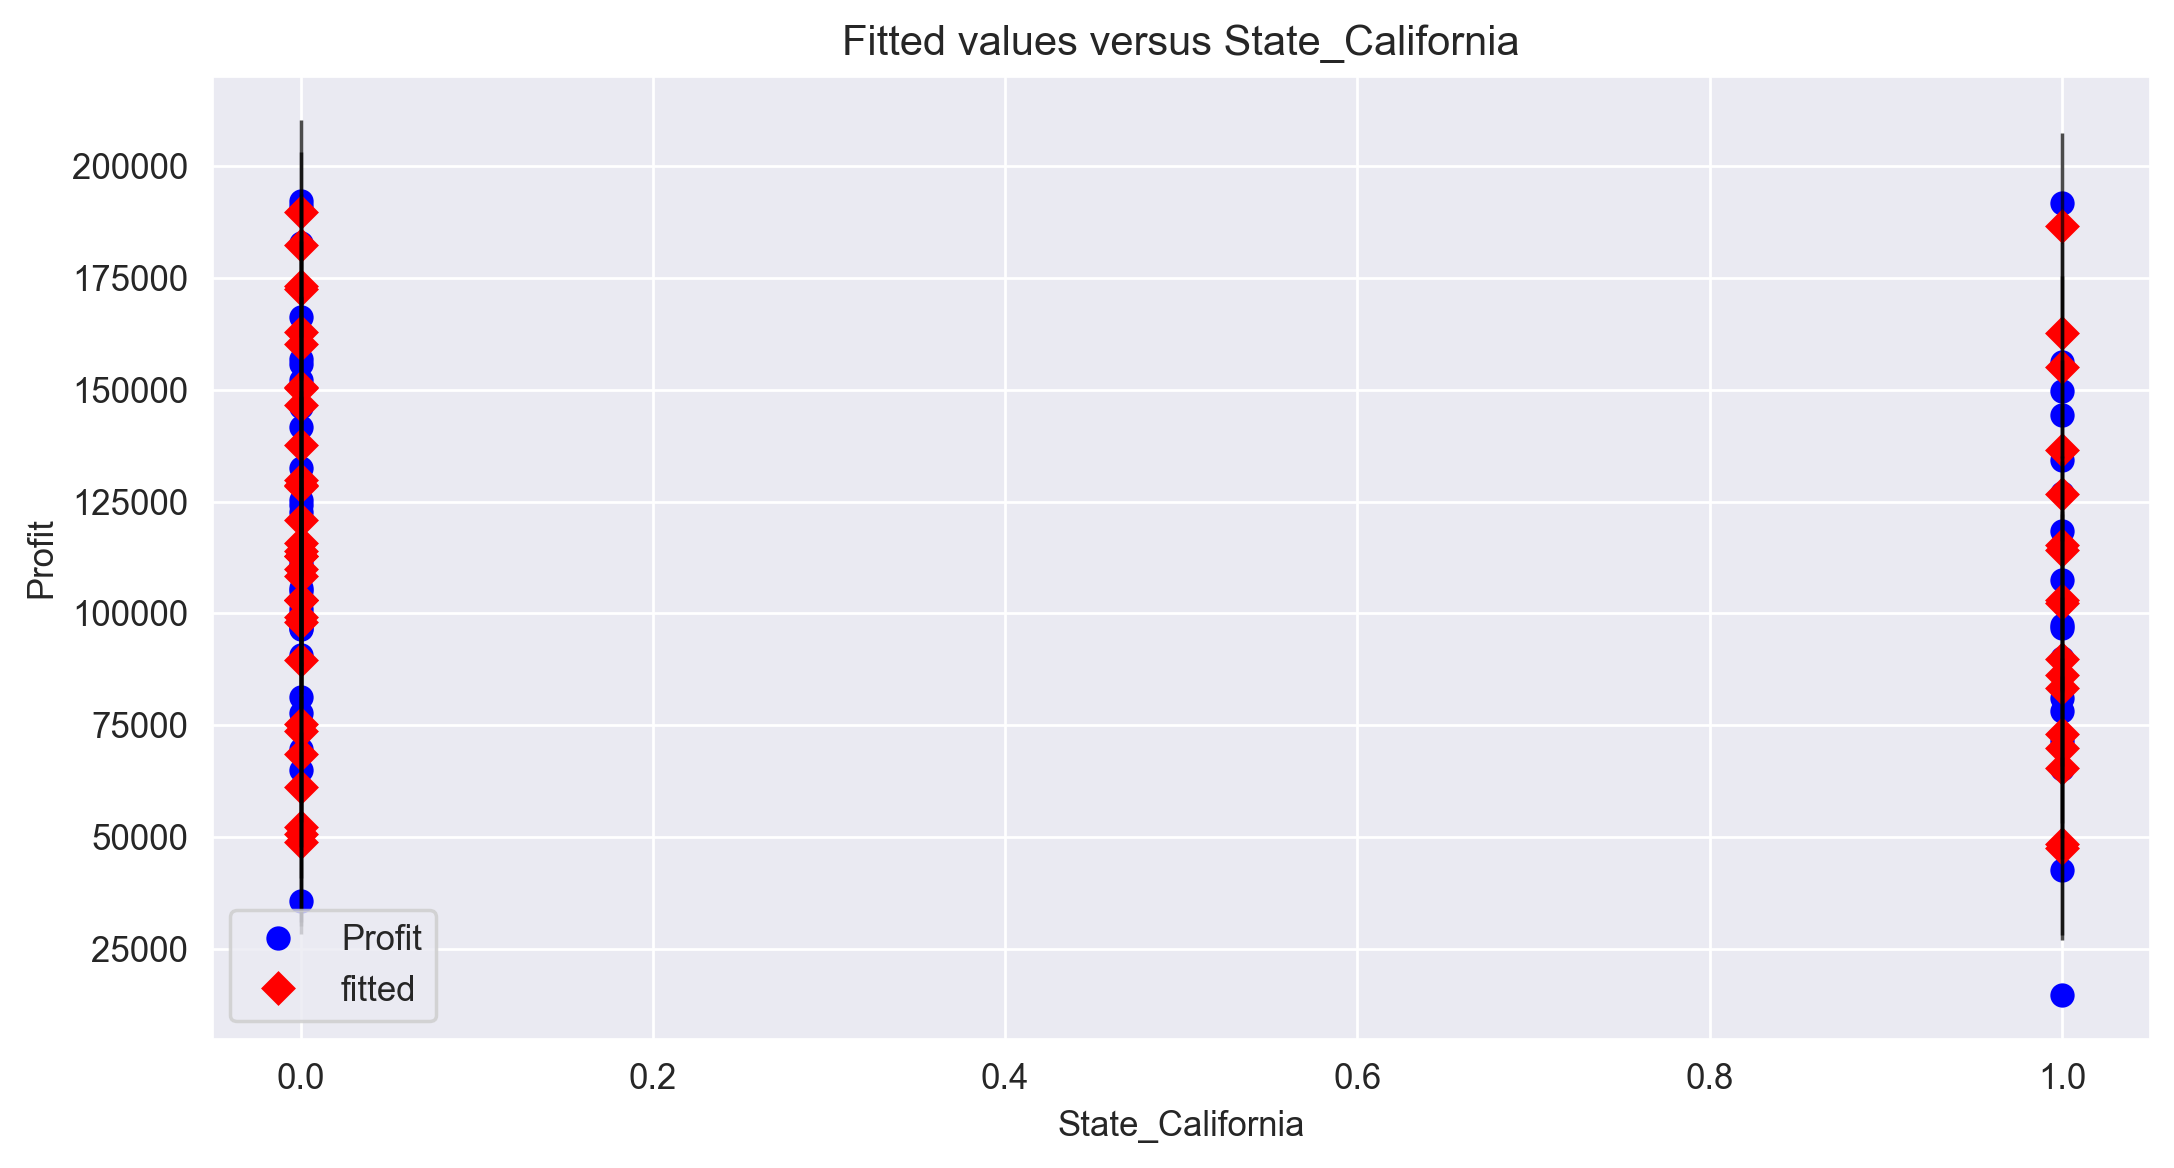

In [81]:
sm.graphics.plot_fit(model, 'State_California');

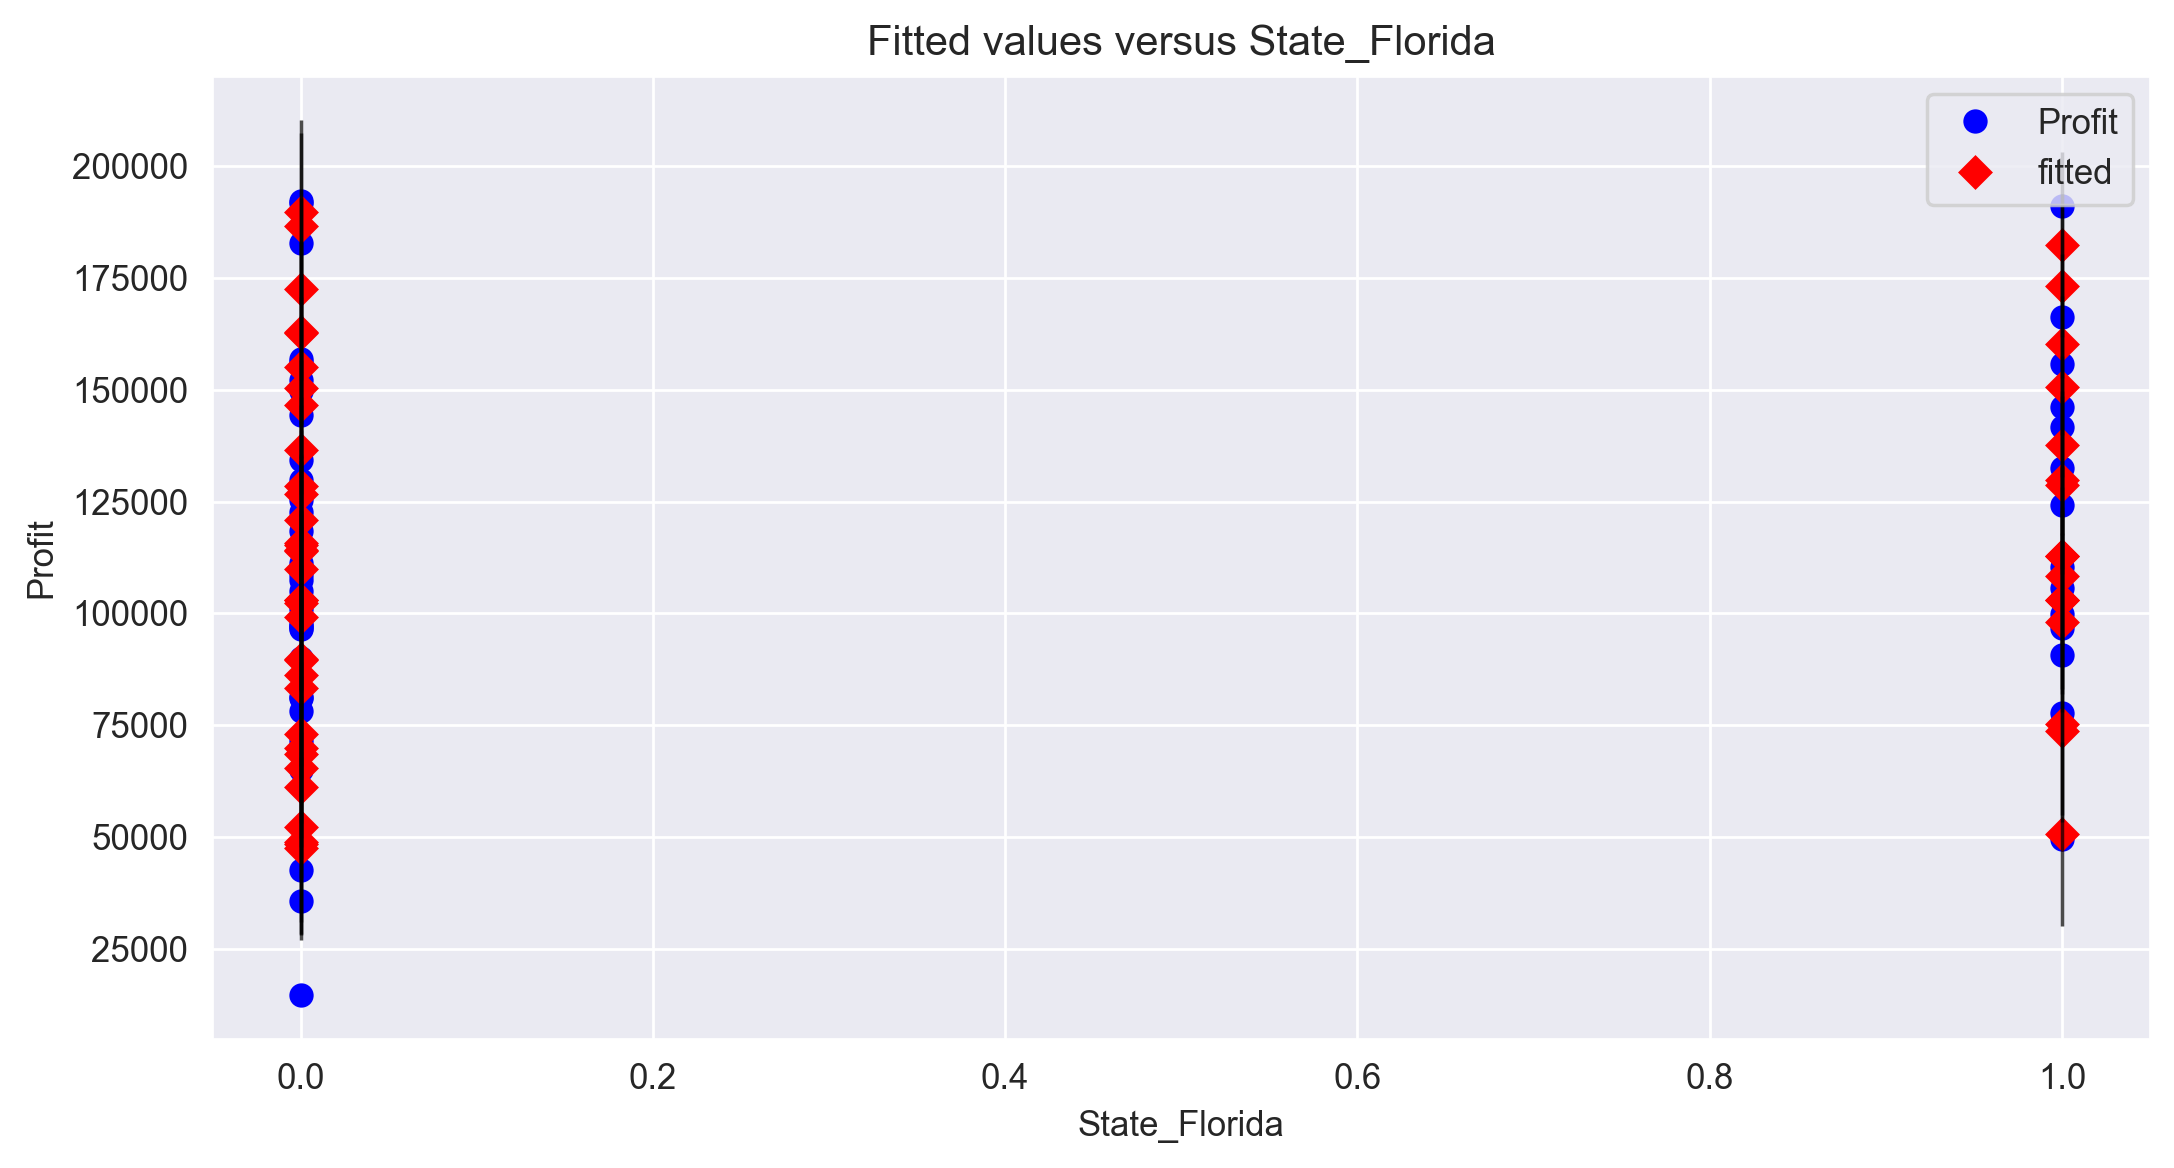

In [82]:
sm.graphics.plot_fit(model, 'State_Florida');

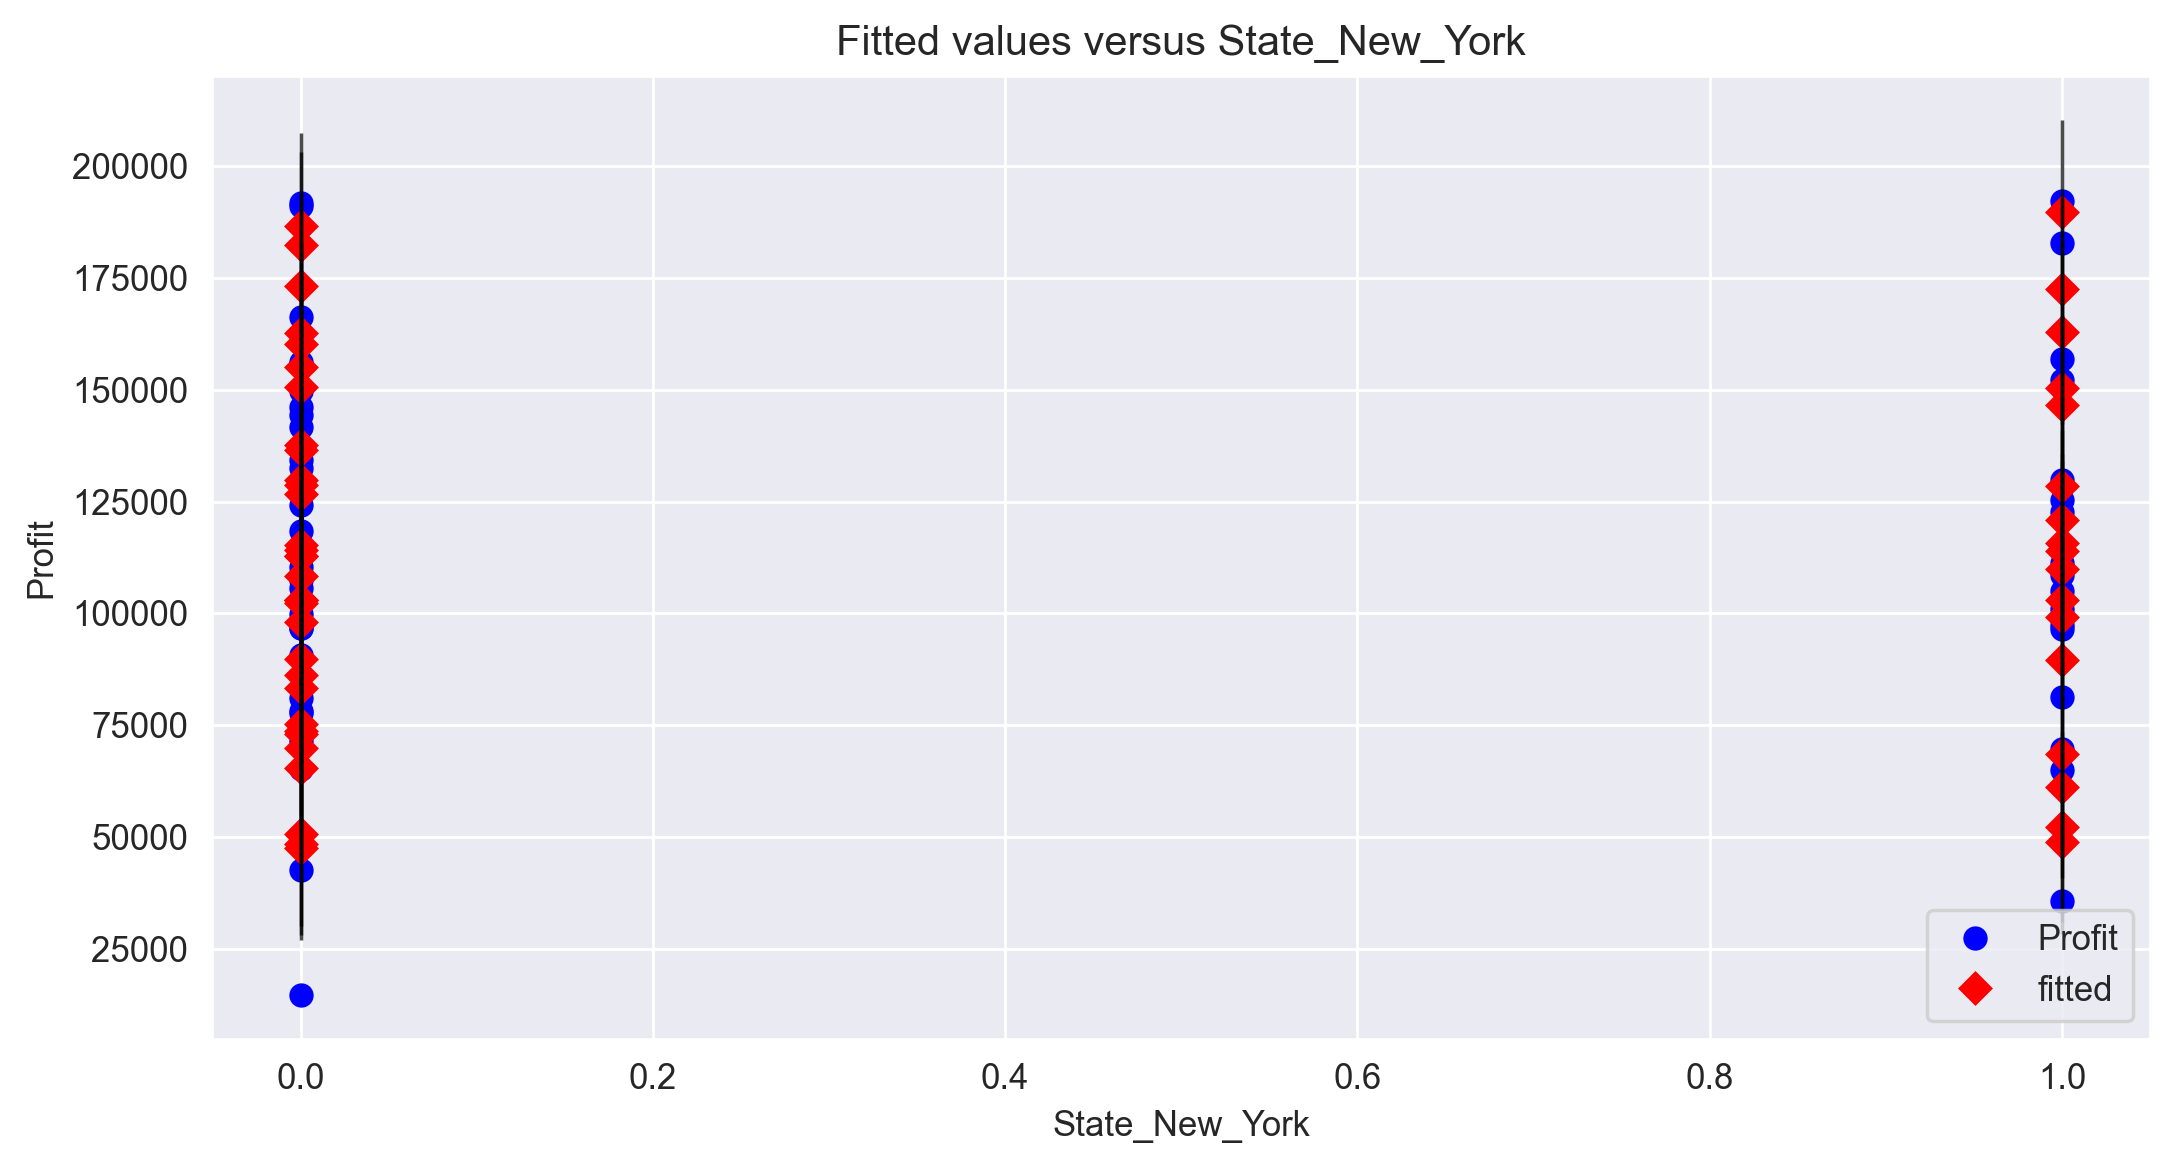

In [83]:
sm.graphics.plot_fit(model, 'State_New_York');

In [84]:
# By plotting all the residuals v/s regressors plot we can say that the model's performace is not up to the mark
# Q-Q plot also told the same
# Constant Variance has also told the same story.
# There is some diference between Actual Profit and Predicted Profit.

In [85]:
# Model Deletion Techniques.
# cook's distance

In [86]:
inf = model.get_influence()
c,p = inf.cooks_distance
c

array([2.19946098e-03, 1.11221009e-02, 2.58260070e-02, 2.65559691e-02,
       1.74479941e-02, 9.04205042e-03, 1.15576488e-02, 4.11497747e-03,
       5.74318139e-04, 6.65523119e-03, 1.10957819e-02, 1.44024111e-02,
       1.85822769e-02, 8.48183617e-03, 7.40174253e-02, 4.39925112e-02,
       1.68444505e-02, 1.44708434e-03, 2.65445495e-03, 6.70135904e-04,
       2.28462421e-03, 1.31119489e-03, 8.62608492e-04, 3.25354061e-05,
       7.73511857e-03, 2.87969648e-03, 8.60675838e-03, 2.96564678e-03,
       5.63356538e-05, 7.69790934e-04, 1.26829326e-03, 5.60654153e-04,
       3.07208423e-03, 2.52138051e-04, 2.61121744e-02, 9.80058622e-03,
       6.02173630e-02, 5.77008768e-06, 6.16772699e-02, 1.26651266e-03,
       3.97378906e-03, 1.70914554e-03, 4.76110087e-04, 1.66681414e-02,
       3.27757295e-05, 7.23347107e-02, 4.54303473e-04, 6.51805063e-03,
       1.68587337e-01, 2.58546212e-01])

In [87]:
# Plotting cooks distance

Text(0, 0.5, 'Cooks Distance')

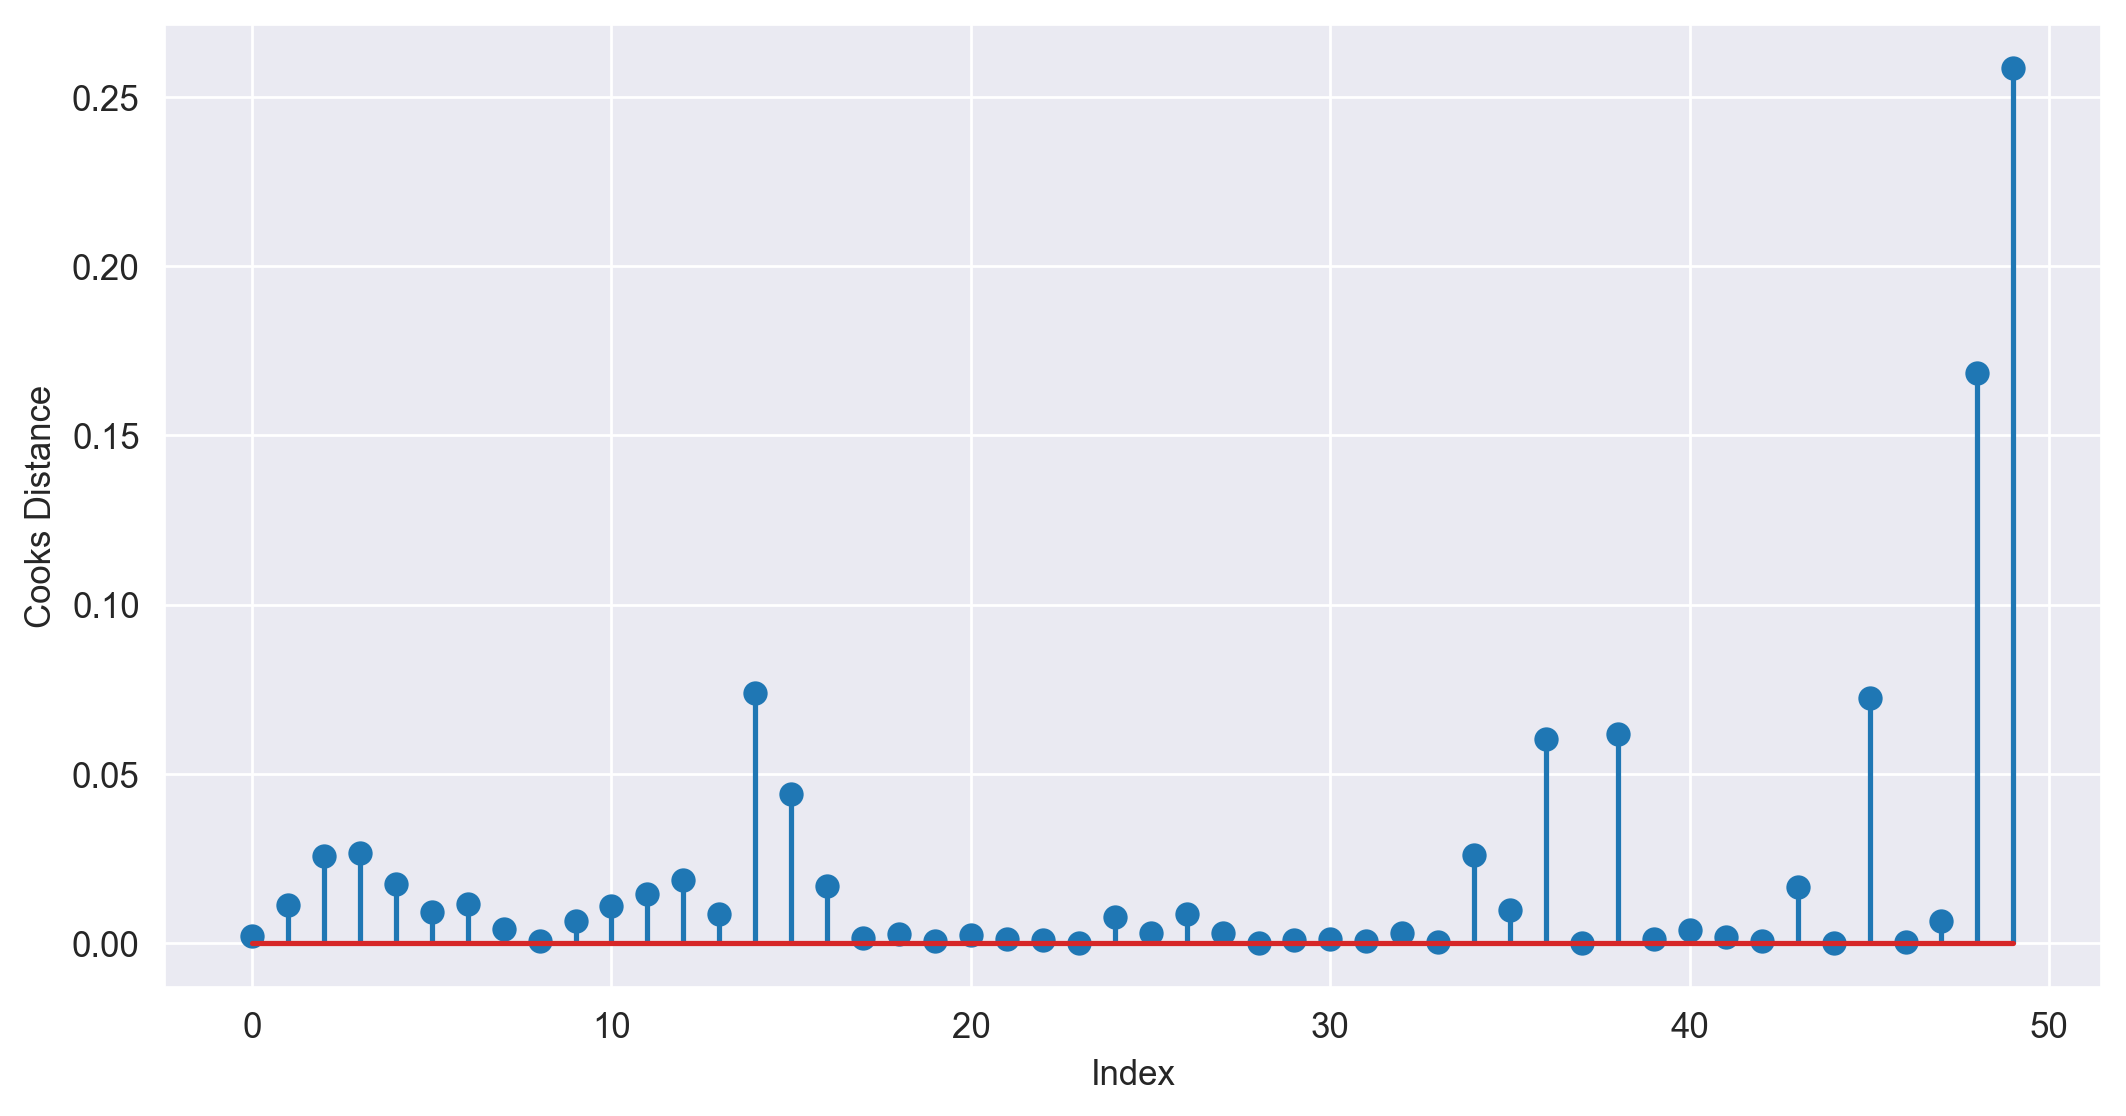

In [88]:
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [89]:
# Checking index no. of minimum cooks distance

In [90]:
np.argmin(c), np.min(c)

(37, 5.770087676975924e-06)

In [91]:
np.argmax(c), np.max(c)

(49, 0.25854621175797027)

In [92]:
df.iloc[[49]]

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
49,0.0,116983.8,45173.06,14681.4,1,0,0


In [93]:
df.iloc[[37]]

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
37,44069.95,51283.14,197029.42,89949.14,1,0,0


In [94]:
df.head()

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [95]:
# Calculating the cut off of cooks distance

In [96]:
k = len(df.columns)
n = len(df)
lv = 3*(k+1)/n
lv

0.48

In [97]:
# Plotting influence plot

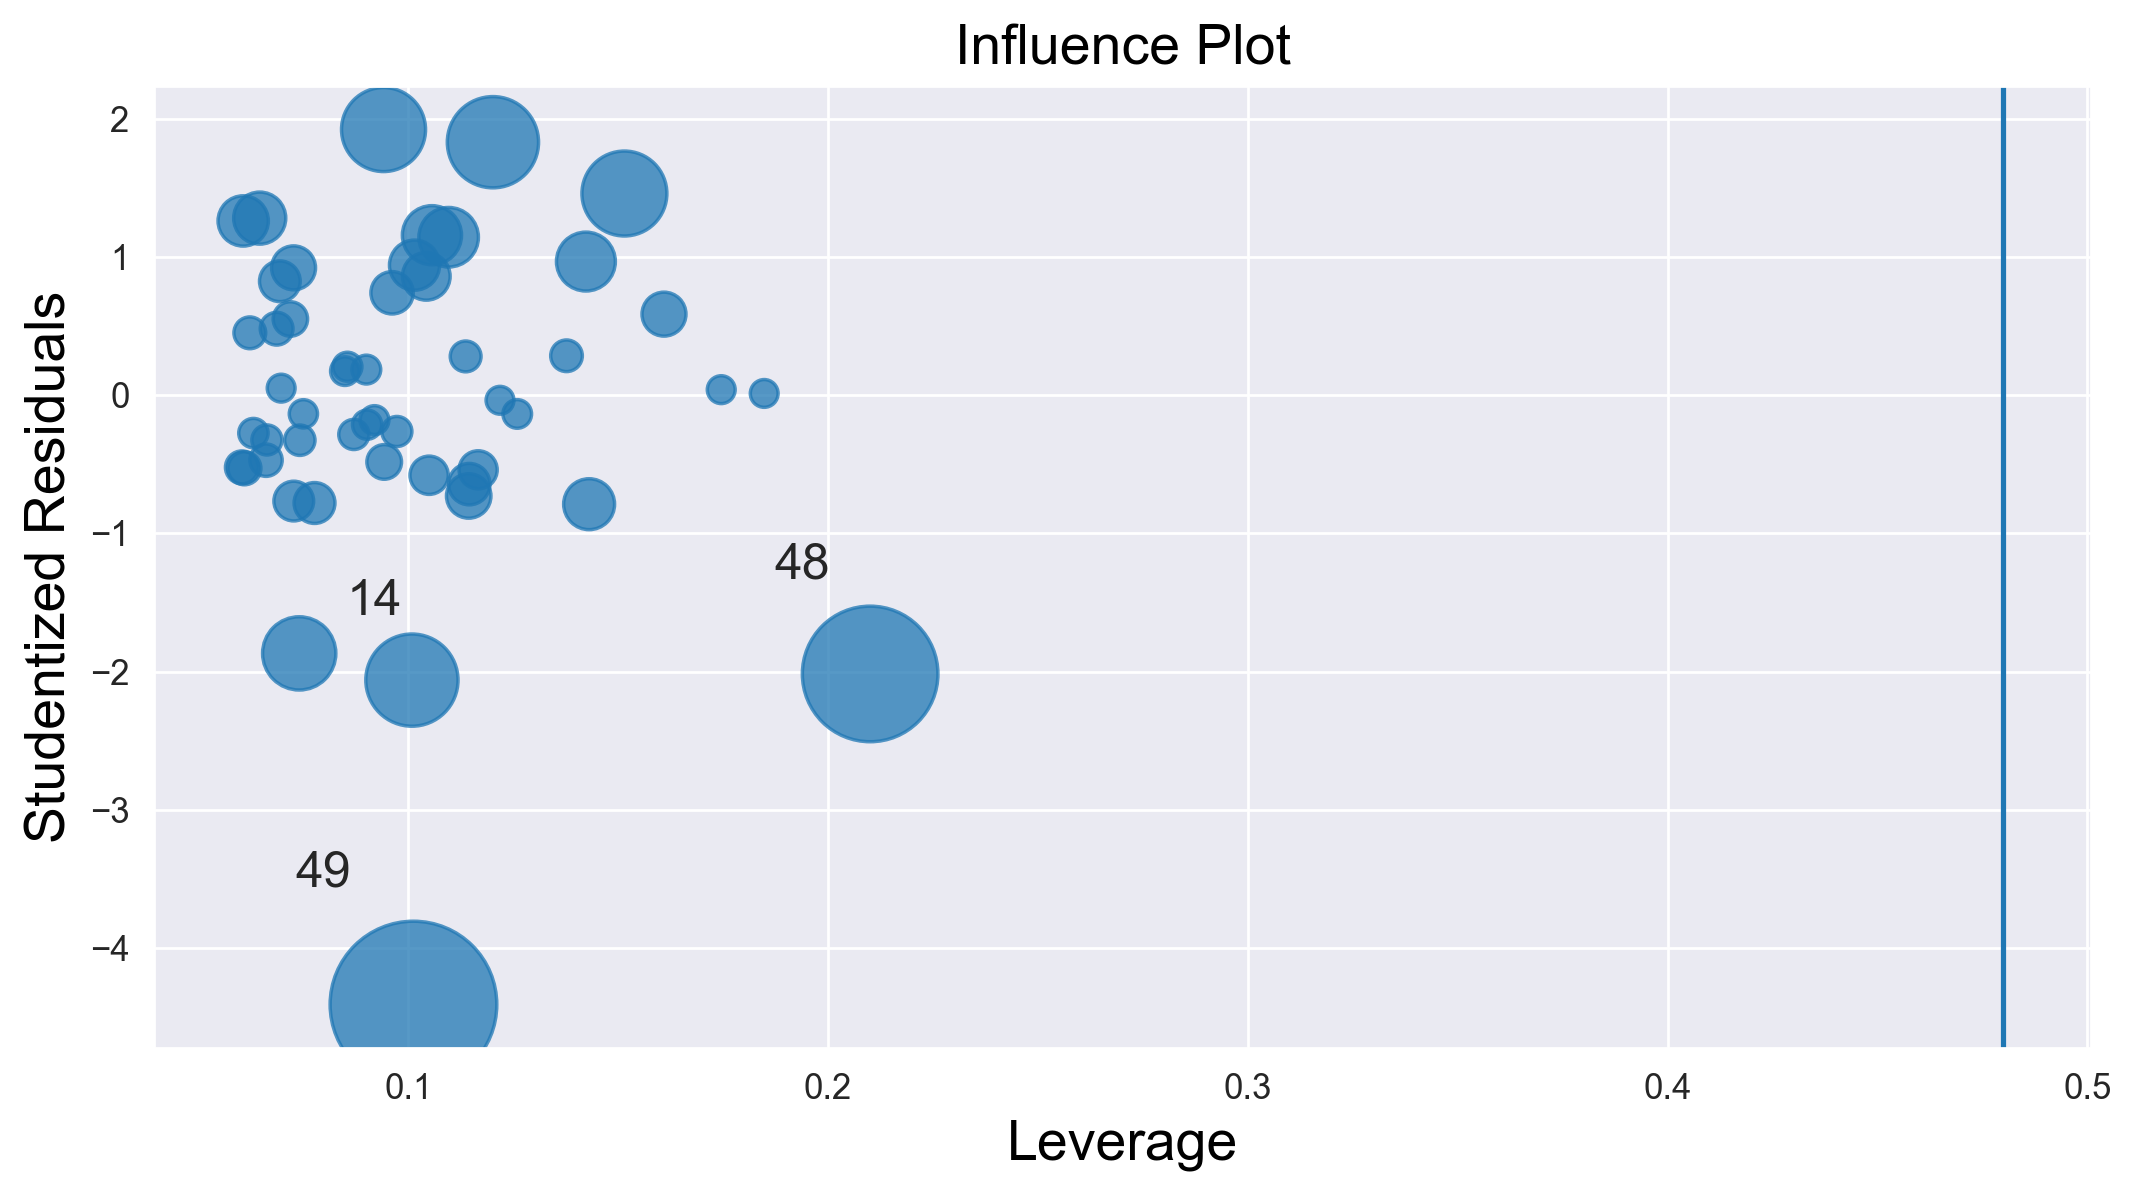

In [98]:
influence_plot(model)
plt.axvline(lv)

In [99]:
# Extracting influencial data points

In [100]:
influential_records = df.index[c > lv]
influential_records

Int64Index([], dtype='int64')

In [101]:
# I think there is no Leverage datapoints which are impacting model.
# I think the 5% error in model is acceptable because the data fitted to model contains very less records.

In [102]:
# So the "RnD_model", "model" is our "final_model".

In [103]:
final_model = smf.ols('Profit~RnD_Spend+Administration+State_California+State_Florida+State_New_York', data=df).fit()
final_model.rsquared

0.9479799298023537

In [104]:
# Data Transformation
#1. sqrt Transformation

In [105]:
sqrt_data = pd.DataFrame({
    'sqrt_RnD': np.sqrt(df['RnD_Spend']),
    'sqrt_administration': np.sqrt(df['Administration']),
    'sqrt_marketing_spend': np.sqrt(df['Marketing_Spend']),
    'sqrt_profit': np.sqrt(df['Profit']),
    'sqrt_california': df['State_California'],
    'sqrt_florida': df['State_Florida'],
    'sqrt_new_york': df['State_New_York']
})

sqrt_data.head()

,sqrt_RnD,sqrt_administration,sqrt_marketing_spend,sqrt_profit,sqrt_california,sqrt_florida,sqrt_new_york
0,406.631529,369.997027,686.865416,438.476715,0,0,1
1,403.234051,389.072731,666.257105,437.940704,1,0,0
2,391.716109,318.033882,638.697534,437.093114,0,1,0
3,379.963696,344.487808,619.031195,427.670422,0,0,1
4,376.971272,302.310718,605.118517,407.661551,0,1,0


In [106]:
x = sqrt_data.drop('sqrt_profit', axis=1)
y = sqrt_data['sqrt_profit']
sqrt_model = smf.ols('y ~ x', data=sqrt_data).fit()
sqrt_model


In [107]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     119.3
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.98e-24
Time:                        18:49:25   Log-Likelihood:                -212.12
No. Observations:                  50   AIC:                             436.2
Df Residuals:                      44   BIC:                             447.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    140.7013     17.169      8.195      0.000     106.100     175.303
x[0]           0.5742      0.036     15.744      0.000       0.501       0.648
x[1]          -0.0286      0.065     -0.440      0.662      -0.160       0.102
x[2]           0.0162      0.022      0.739      0.464      -0.028       0.060
x[3]          44.7597      6.654      6.726      0.000      31.349      58.171
x[4]          46.8991      7.211      6.503      0.000      32.365      61.433
x[5]          49.0425      6.515      7.528      0.000      35.912      62.173
==============================================================================
Omnibus:                        8.716   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               19.053
Skew:                           0.092   Prob(JB):                     7.29e-05
Kurtosis:                       6.019   Cond. No.                     5.63e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.14e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [108]:
sqrt_model.rsquared

0.9312862332501143

In [109]:
# Q-Q plot

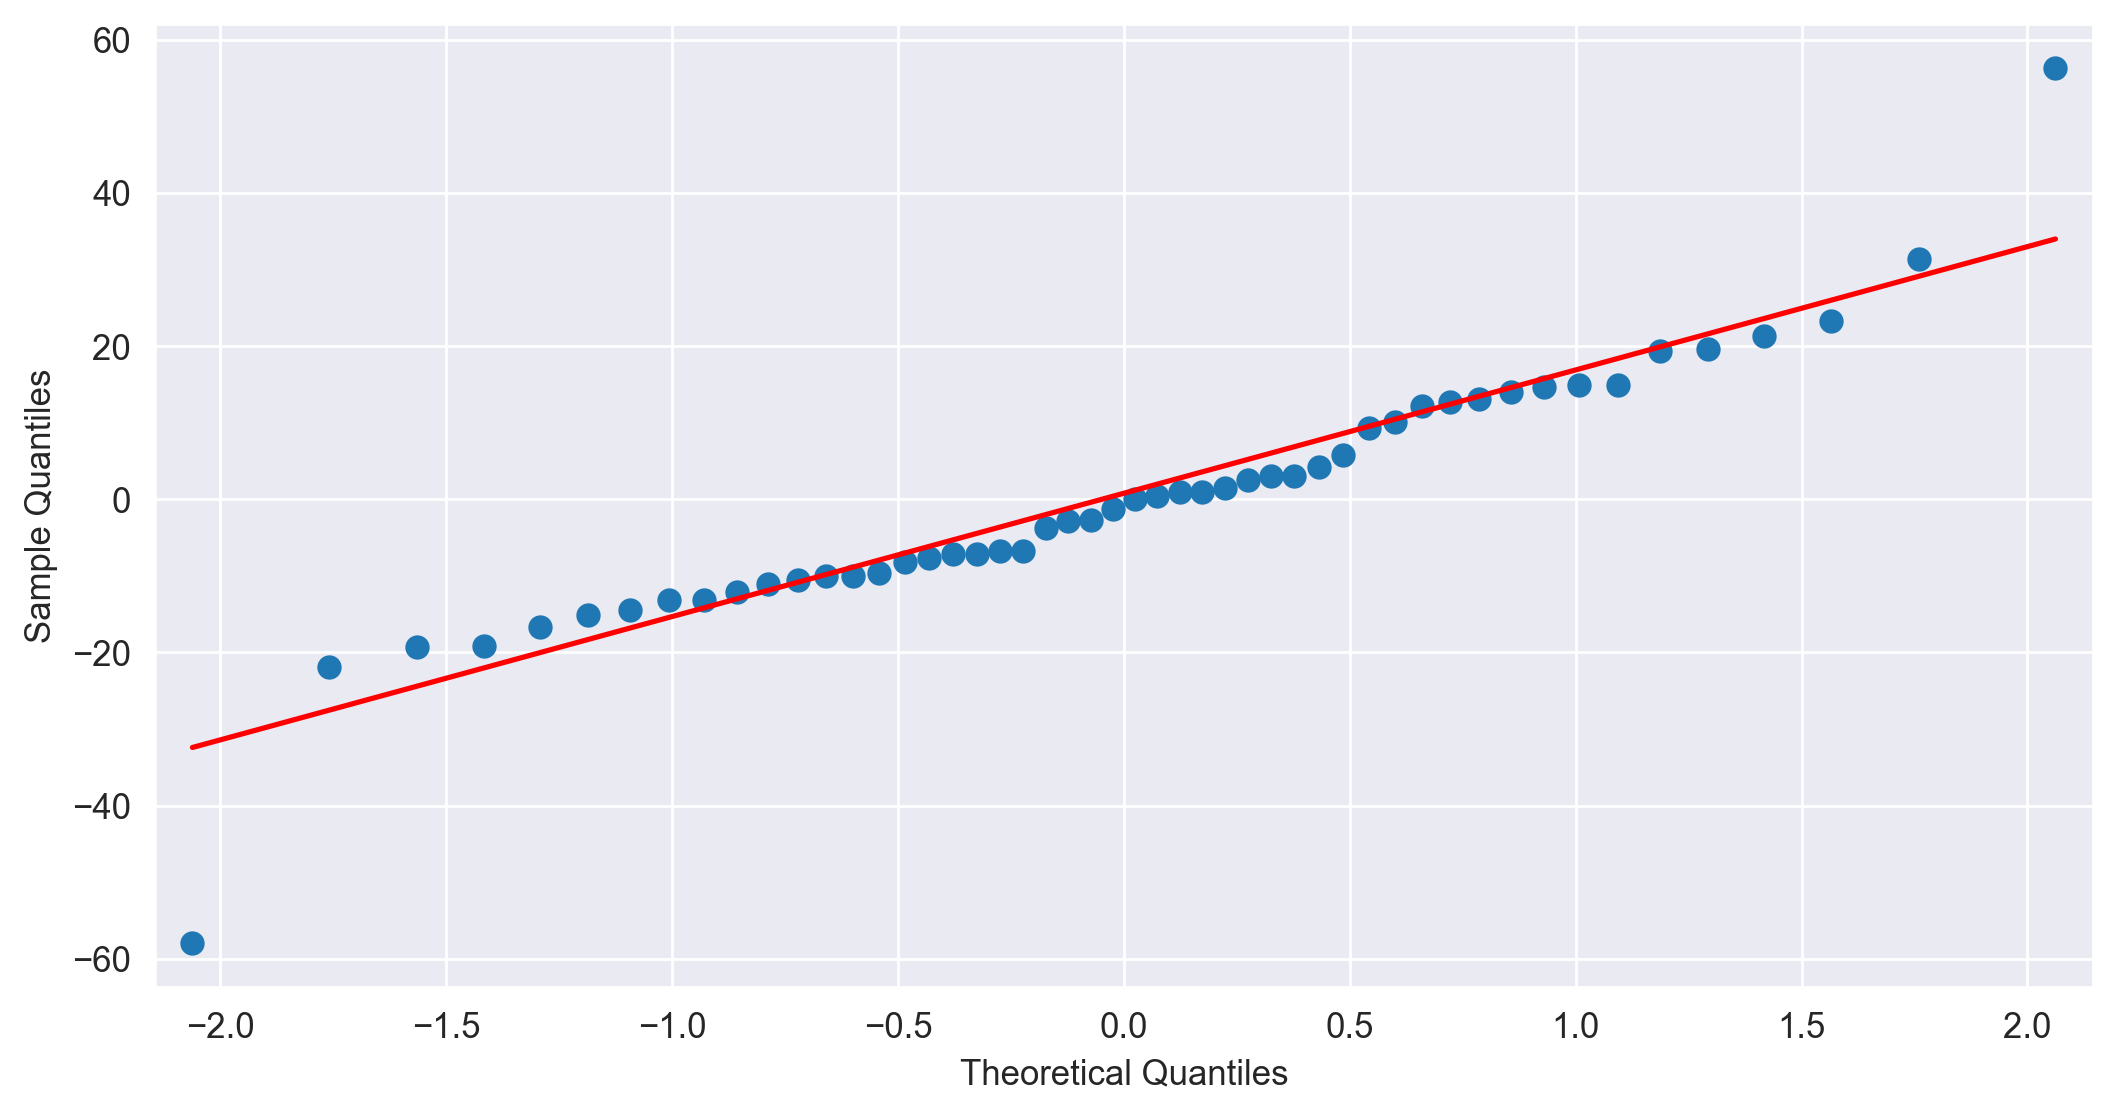

In [110]:
sm.qqplot(sqrt_model.resid, line='q');

In [111]:
#2. log method

In [112]:
data_log = pd.DataFrame({
    'log_RnD': np.log(df['RnD_Spend']),
    'log_administration': np.log(df['Administration']),
    'log_marketing_spend': np.log(df['Marketing_Spend']),
    'log_profit': np.log(df['Profit']),
    'log_california': df['State_California'],
    'log_florida': df['State_Florida'],
    'log_new_york': df['State_New_York']
})

data_log.head()

,log_RnD,log_administration,log_marketing_spend,log_profit,log_california,log_florida,log_new_york
0,12.015815,11.826990,13.064277,12.166613,0,0,1
1,11.999034,11.927533,13.003351,12.164167,1,0,0
2,11.941075,11.524316,12.918862,12.160292,0,1,0
3,11.880151,11.684117,12.856311,12.116706,0,0,1
4,11.864338,11.422911,12.810849,12.020875,0,1,0


In [113]:
X = data_log.drop('log_profit', axis=1)
Y = data_log['log_profit']

# Adding a small constant to avoid "-inf" values
epsilon = 1e-10
X_log = np.log(X + epsilon)
Y_log = np.log(Y + epsilon)

# Create a DataFrame with both X and Y
data_log = pd.concat([X_log, Y_log], axis=1)


In [114]:
data_log['log_california'] = df['State_California']
data_log['log_florida'] = df['State_Florida']
data_log['log_new_york'] = df['State_New_York']
data_log.head()

,log_RnD,log_administration,log_marketing_spend,log_california,log_florida,log_new_york,log_profit
0,2.486224,2.470384,2.569882,0,0,1,2.498696
1,2.484826,2.478849,2.565207,1,0,0,2.498495
2,2.479984,2.444459,2.558688,0,1,0,2.498176
3,2.474869,2.458230,2.553835,0,0,1,2.494585
4,2.473537,2.435621,2.550292,0,1,0,2.486645


In [115]:
log_model = smf.ols('log_profit~log_RnD+log_administration+log_marketing_spend+log_california+log_florida+log_new_york', data=data_log).fit()
log_model

In [116]:
log_model.rsquared

0.6856413614679895

In [117]:
# Q-Q plot

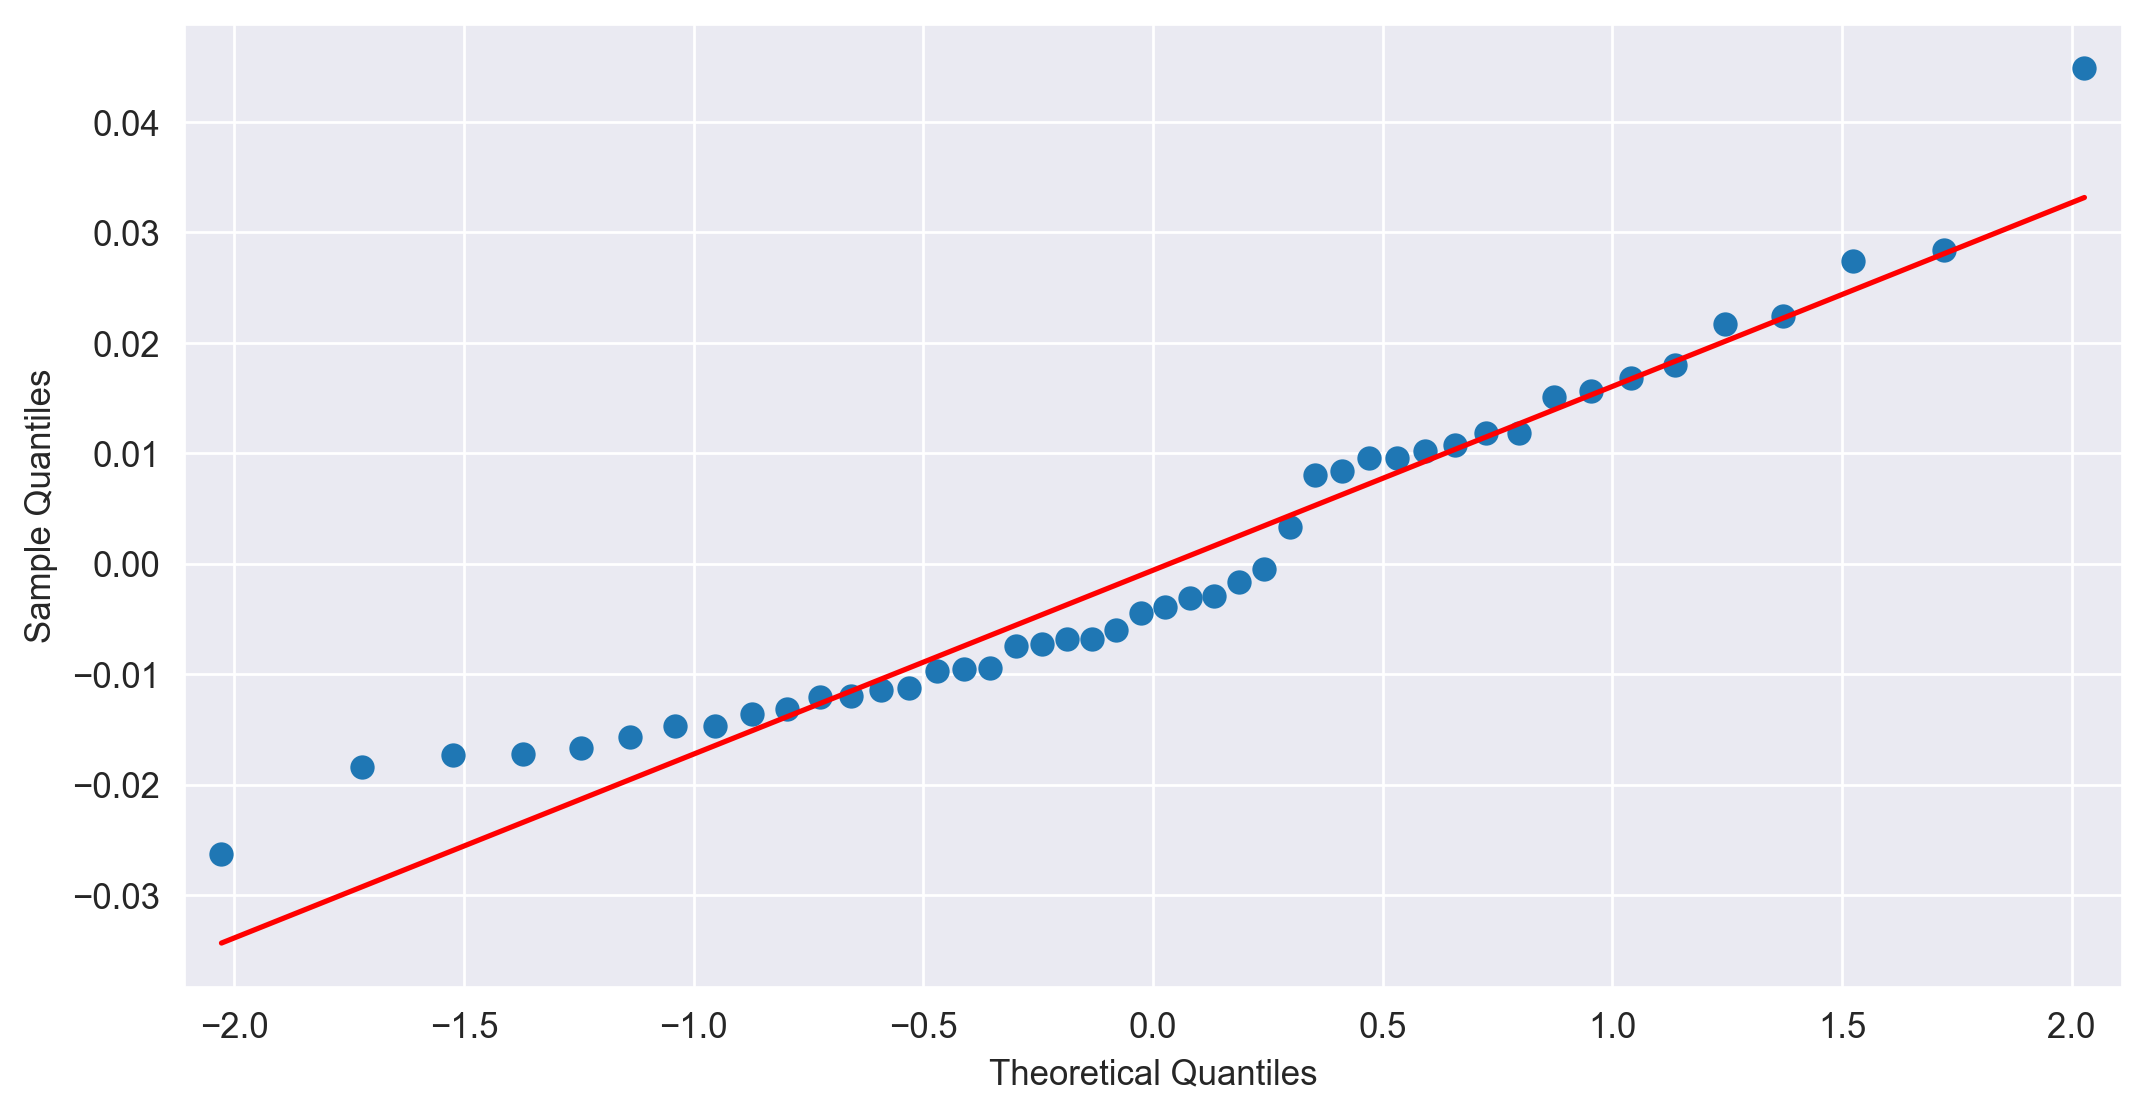

In [118]:
sm.qqplot(log_model.resid, line='q');

In [119]:
# making a table containing R^2 value for each prepared model.

In [120]:
R2_table = pd.DataFrame({
    'Model': ['Basic_model', 'marketing_model', 'RnD_model', 'model', 'Final_model', 'Sqrt_model', 'log_model'],
    'R-squared': [basic_model.rsquared, marketing_model.rsquared, RnD_model.rsquared, model.rsquared, final_model.rsquared, sqrt_model.rsquared, log_model.rsquared]
})
R2_table

,Model,R-squared
0,Basic_model,1.000000
1,marketing_model,0.613108
2,RnD_model,0.947980
3,model,0.947980
4,Final_model,0.947980
5,Sqrt_model,0.931286
6,log_model,0.685641


In [121]:
# VIF table

In [122]:
VIF

,Features,VIF
0,RnD_Spend,2.495511
1,Administration,1.177766
2,Marketing_Spend,2.416797
3,State_California,9.044052
4,State_Florida,9.443578
5,State_New_York,9.222969
